# National Health and Nutrition Examination Survey

### 2017 - 2018 Data Documentation, Codebook and Frequencies

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
import missingno as msno

In [2]:
metademo = {
    "SEQN": "Respondent sequence number",
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age in years"
}

metacbc = {
    'LBXWBCSI':('White blood cell count','10³ cells/uL'),
    'LBXLYPCT':('Lymphocyte percent','%'),
    'LBXMOPCT':('Monocyte percent','%'),
    'LBXNEPCT':('Segmented neutrophils percent','%'),
    'LBXEOPCT':('Eosinophils percent','%'),
    'LBXBAPCT':('Basophils percent','%'),
    'LBDLYMNO':('Lymphocyte number','10³ cells/uL'),
    'LBDMONO':('Monocyte number','10³ cells/uL'),
    'LBDNENO':('Segmented neutrophils number','10³ cells/uL'),
    'LBDEONO':('Eosinophils number','10³ cells/uL'),
    'LBDBANO':('Basophils number','10³ cells/uL'),
    'LBXRBCSI':('Red blood cell count','10⁶ cells/uL'),
    'LBXHGB':('Hemoglobin','g/dL'),
    'LBXHCT':('Hematocrit','%'),
    'LBXMCVSI':('Mean cell volume','fL'),
    'LBXMCHSI':('Mean cell hemoglobin','pg'),
    'LBXMC':('Mean cell hemoglobin concentration','g/dL'),
    'LBXRDW':('Red cell distribution width','%'),
    'LBXPLTSI':('Platelet count','10³ cells/uL'),
    'LBXMPSI':('Mean platelet volume','fL')
}

metabio = {
    "LBXSAL":("Albumin","g/dL"),
    "LBDSALSI":("Albumin","g/L"),
    "LBXSATSI":("Alanine aminotransferase (ALT)" ,"U/L"),
    "LBXSASSI":("Asparate aminotransferase (AST)", "U/L"),
    "LBXSAPSI":("Alkaline phosphotase", "U/L"),
    "LBXSBU":("Blood urea nitrogen", "mg/dL"),
    "LBXSCA":("Total calcium", "mg/dL"),
    "LBDSCASI":("Total calcium", "mmol/L"),
    "LBDSBUSI":("Blood urea nitrogen","mmol/L"),
    "LBXSCH":("Cholesterol", "mg/dL"),
    "LBDSCHSI":("Cholesterol", "mmol/L"),
    "LBXSC3SI":("Bicarbonate", "mmol/L"),
    "LBXSCR":("Creatinine", "mg/dL"),
    "LBDSCRSI":("Creatinine", "µmol/L"),
    "LBXSGTSI":("Gamma glutamyl transferase", "U/L)"),
    "LBXSGL":("Glucose, serum", "mg/dL"),
    "LBDSGLSI":("Glucose, serum", "mmol/L"),
    "LBXSIR":("Iron, refigerated", "ug/dL"),
    "LBDSIRSI":("Iron, refigerated", "umol/L"),
    "LBXSLDSI":("Lactate dehydrogenase LDH", "U/L"),
    "LBXSPH": ("Phosphorus", "mg/dL"),
    "LBDSPHSI":("Phosphorus", "mmol/L"),
    "LBXSTB": ("Total bilirubin", "mg/dL"),
    "LBDSTBSI": ("Bilirubin, total", "umol/L"),
    "LBXSTP": ("Total protein", "g/dL"),
    "LBDSTPSI": ("Total protein", "g/L"),
    "LBXSTR": ("Triglycerides", "mg/dL"),
    "LBDSTRSI": ("Triglycerides", "mmol/L"),
    "LBXSUA": ("Uric acid", "mg/dL"),
    "LBDSUASI": ("Uric acid", "umol/L"),
    "LBXSNASI": ("Sodium", "mmol/L"),
    "LBXSKSI": ("Potassium", "mmol/L"),
    "LBXSCLSI": ("Chloride", "mmol/L"),
    "LBXSOSSI": ("Osmolality", "mmol/Kg"),
    "LBXSGB": ("Globulin", "g/dL"),
    "LBDSGBSI": ("Globulin", "g/L")
}

---

# Complete Blood Count with 5-Part Differential (CBC)
* Category: Hematology.
* Range: 2007-2008
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/CBC_E.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

Prefixes and suffixes explained:

* LBX- = Lab sample
* -SI = [...] Count/Volume
* -PCT = [...] Percent
* -NO = [...] Number

In [3]:
cbc = pd.read_sas('CBC_J.xpt')
cbc.describe()

SEQN     LBXWBCSI     LBXLYPCT     LBXMOPCT     LBXNEPCT  \
count    8366.000000  7528.000000  7523.000000  7523.000000  7523.000000   
mean    98320.869950     7.383103    34.105982     8.199521    54.089273   
std      2669.896206     5.106263    10.660190     2.232815    11.345314   
min     93703.000000     1.900000     4.400000     0.700000     8.400000   
25%     96003.250000     5.800000    26.700000     6.700000    47.400000   
50%     98332.500000     7.000000    33.100000     7.900000    55.100000   
75%    100629.750000     8.500000    40.200000     9.300000    61.900000   
max    102956.000000   400.000000    89.700000    57.200000    92.800000   

           LBXEOPCT     LBXBAPCT     LBDLYMNO      LBDMONO      LBDNENO  ...  \
count  7.523000e+03  7523.000000  7523.000000  7523.000000  7523.000000  ...   
mean   2.974651e+00     0.755045     2.501595     0.587824     4.034640  ...   
std    2.332996e+00     0.329833     4.316500     0.215080     1.732227  ...   
min    5.397605e-79     0.100000     0.400000     0.100000     0.400000  ...   
25%    1.500000e+00     0.500000     1.800000     0.500000     2.800000  ...   
50%    2.400000e+00     0.700000     2.300000     0.600000     3.800000  ...   
75%    3.700000e+00     0.900000     2.900000     0.700000     4.900000  ...   
max    2.910000e+01     4.800000   358.800000     6.700000    35.200000  ...   

          LBXRBCSI       LBXHGB       LBXHCT     LBXMCVSI     LBXMCHSI  \
count  7528.000000  7528.000000  7528.000000  7528.000000  7528.000000   
mean      4.733653    13.726275    40.849601    86.563470    29.074110   
std       0.480037     1.510789     4.169070     6.594074     2.538204   
min       2.320000     6.400000    23.000000    35.400000    12.400000   
25%       4.420000    12.800000    38.000000    82.900000    27.775000   
50%       4.710000    13.700000    40.700000    87.100000    29.300000   
75%       5.030000    14.700000    43.600000    90.900000    30.700000   
max       7.840000    19.900000    58.800000   114.600000    39.200000   

             LBXMC       LBXRDW     LBXPLTSI      LBXMPSI       LBXNRBC  
count  7528.000000  7528.000000  7528.000000  7528.000000  7.523000e+03  
mean     33.569075    13.775319   259.250133     8.093876  8.509903e-02  
std       0.932988     1.271054    70.689106     0.911377  8.344771e-02  
min      25.200000    11.300000     8.000000     5.400000  5.397605e-79  
25%      33.000000    13.000000   211.000000     7.500000  5.397605e-79  
50%      33.600000    13.500000   251.000000     8.000000  1.000000e-01  
75%      34.200000    14.200000   300.000000     8.700000  1.000000e-01  
max      38.300000    29.200000   818.000000    13.000000  2.000000e+00  

[8 rows x 22 columns]

<Axes: >

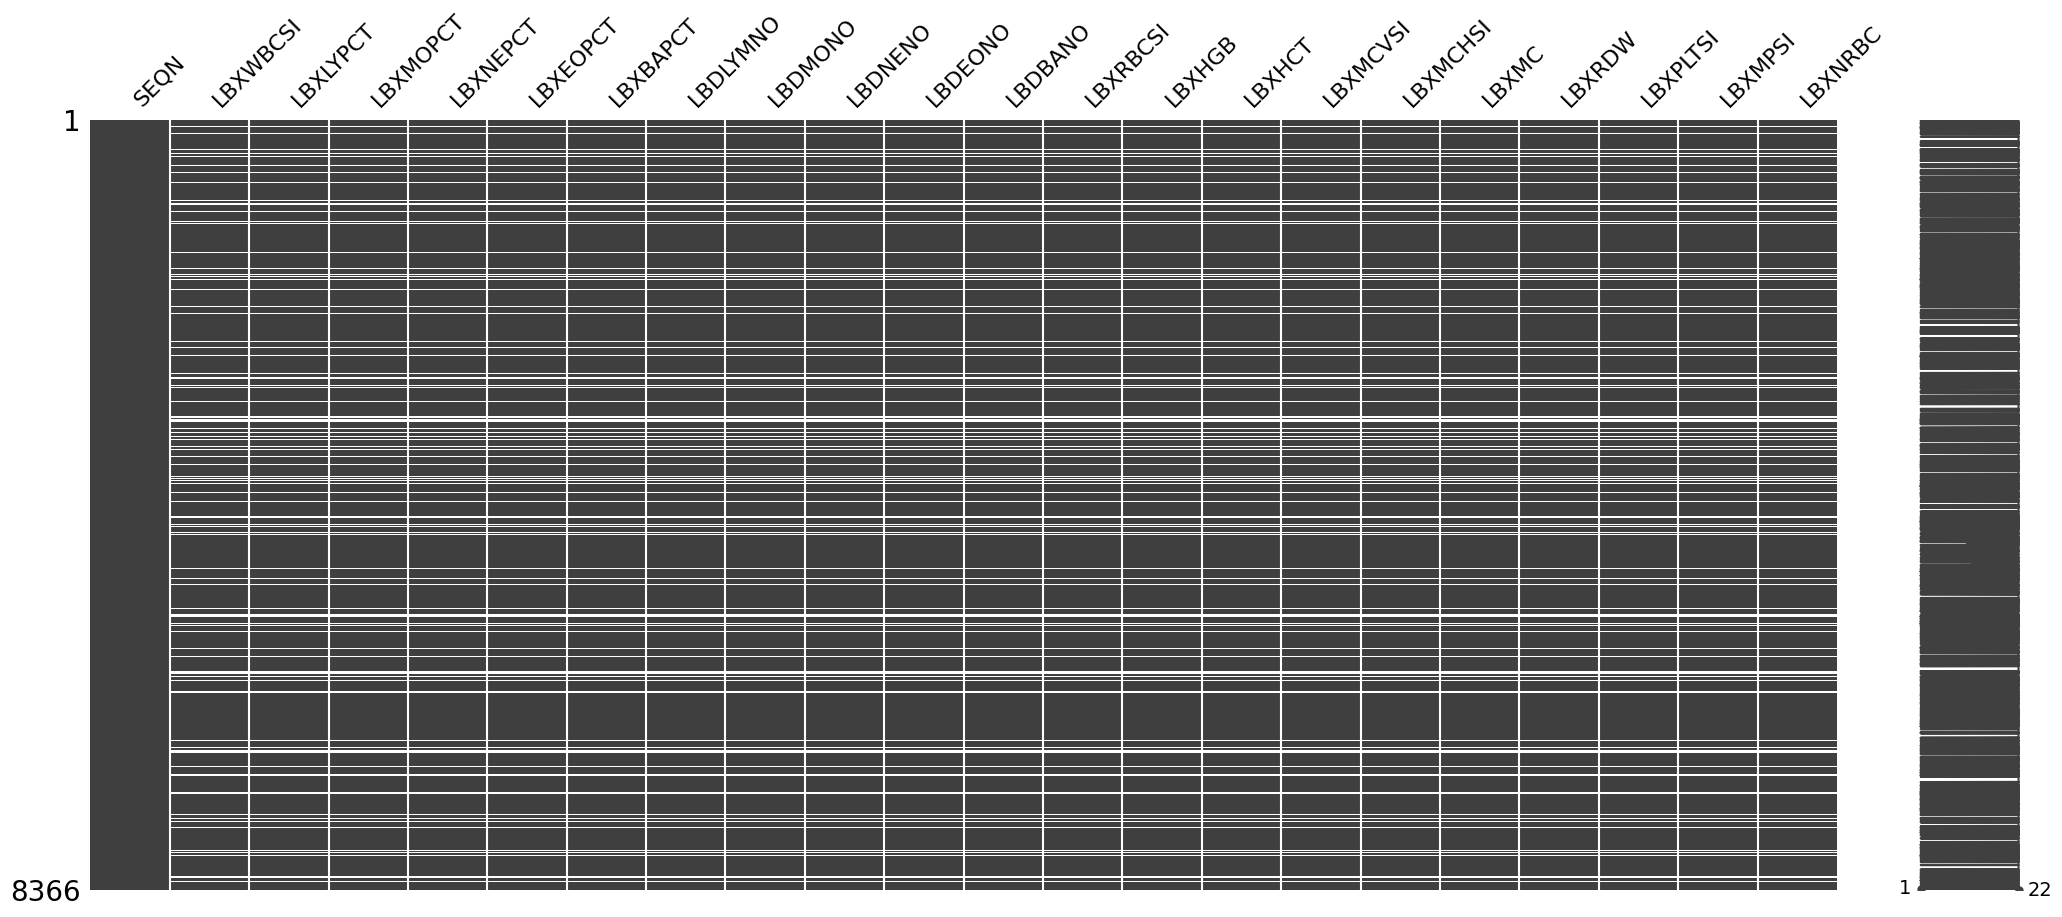

In [4]:
msno.matrix(cbc)

Missing values are not at random. Each sample falls into one of these categories:
* All values listed.
* Not a single value listed.
* Missing the concentration values of white cells subtypes.

In [5]:
cbc.loc[cbc['LBXLYPCT'].isna() & ~cbc['LBXWBCSI'].isna()]

SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
2492  96450.0      11.1       NaN       NaN       NaN       NaN       NaN   
2966  96975.0       7.4       NaN       NaN       NaN       NaN       NaN   
4377  98536.0       6.4       NaN       NaN       NaN       NaN       NaN   
4598  98782.0       8.0       NaN       NaN       NaN       NaN       NaN   
4805  99004.0       5.8       NaN       NaN       NaN       NaN       NaN   

      LBDLYMNO  LBDMONO  LBDNENO  ...  LBXRBCSI  LBXHGB  LBXHCT  LBXMCVSI  \
2492       NaN      NaN      NaN  ...      5.17    15.9    47.3      91.5   
2966       NaN      NaN      NaN  ...      5.57    12.8    40.0      71.9   
4377       NaN      NaN      NaN  ...      4.41    13.1    39.0      88.5   
4598       NaN      NaN      NaN  ...      4.31     7.0    23.3      54.0   
4805       NaN      NaN      NaN  ...      5.24    15.6    47.5      90.6   

      LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  LBXNRBC  
2492      30.7   33.6    12.5     215.0     11.1      0.6  
2966      22.9   31.9    15.5     143.0      8.7      0.5  
4377      29.7   33.6    13.5     198.0      7.6      0.1  
4598      16.2   30.1    22.1     403.0      8.6      NaN  
4805      29.8   32.9    13.1     269.0      8.2      0.4  

[5 rows x 22 columns]

Reasons why the values are missing seems to be related to the sampling practice: either not providing biospecimens, not enough volume or values below the lower limit of detection.

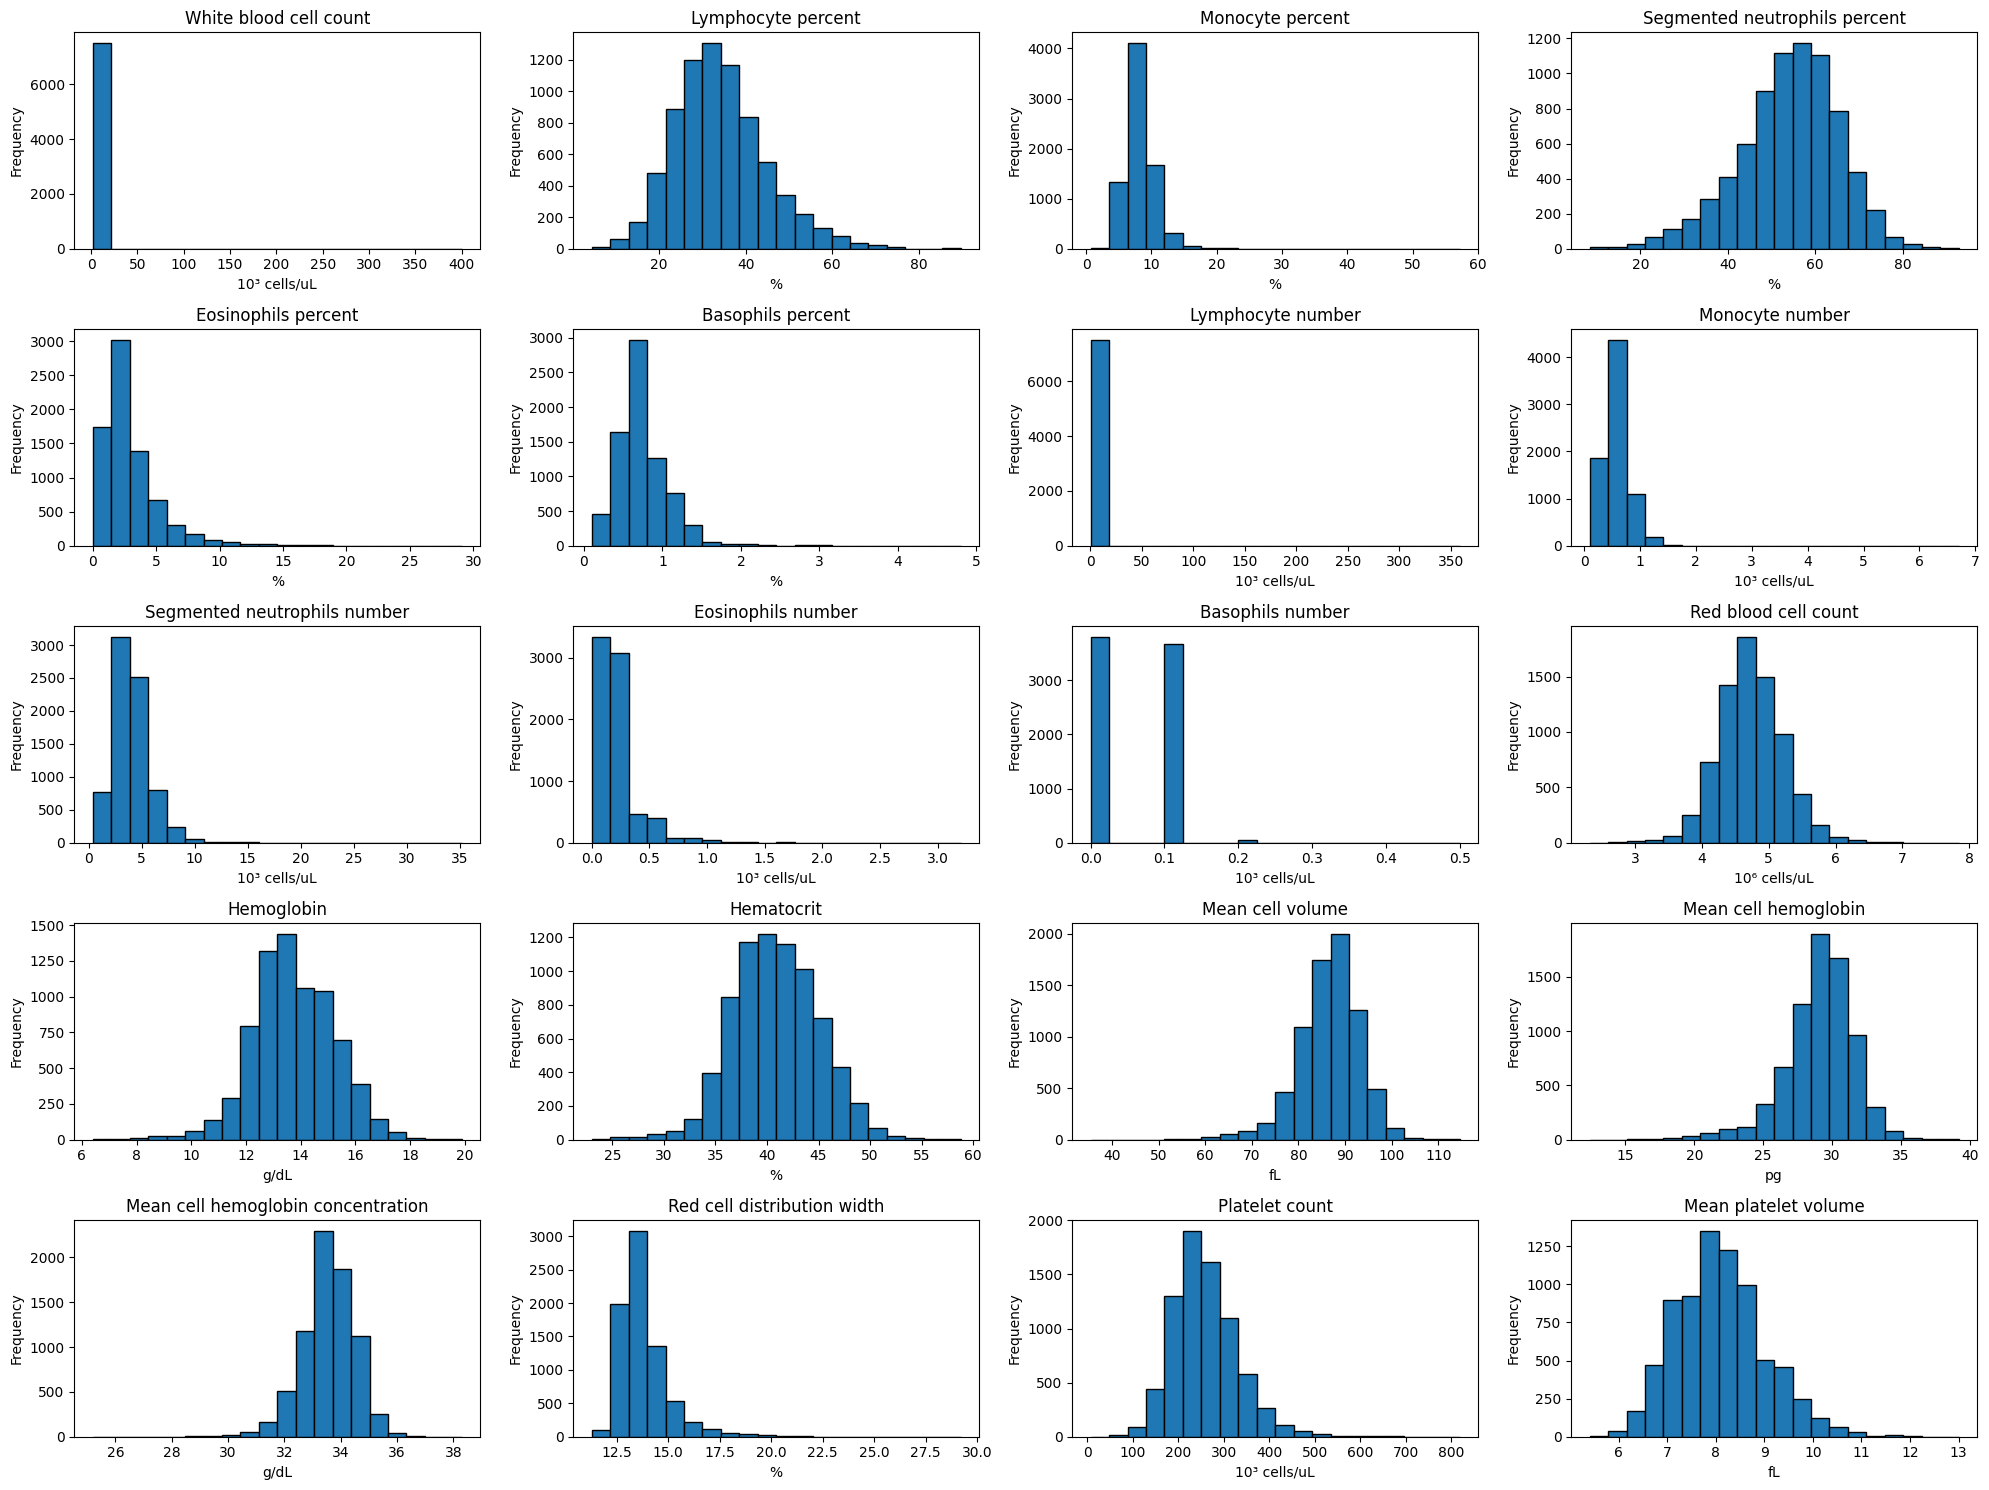

In [6]:
fig, axes = plt.subplots(5,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metacbc.items()):
    ax = axes[i]
    ax.hist(cbc[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

All values are within the lower and upper limits of detection. No apparent cases of extreme outliers.
To be determined the reference intervals from each variable.

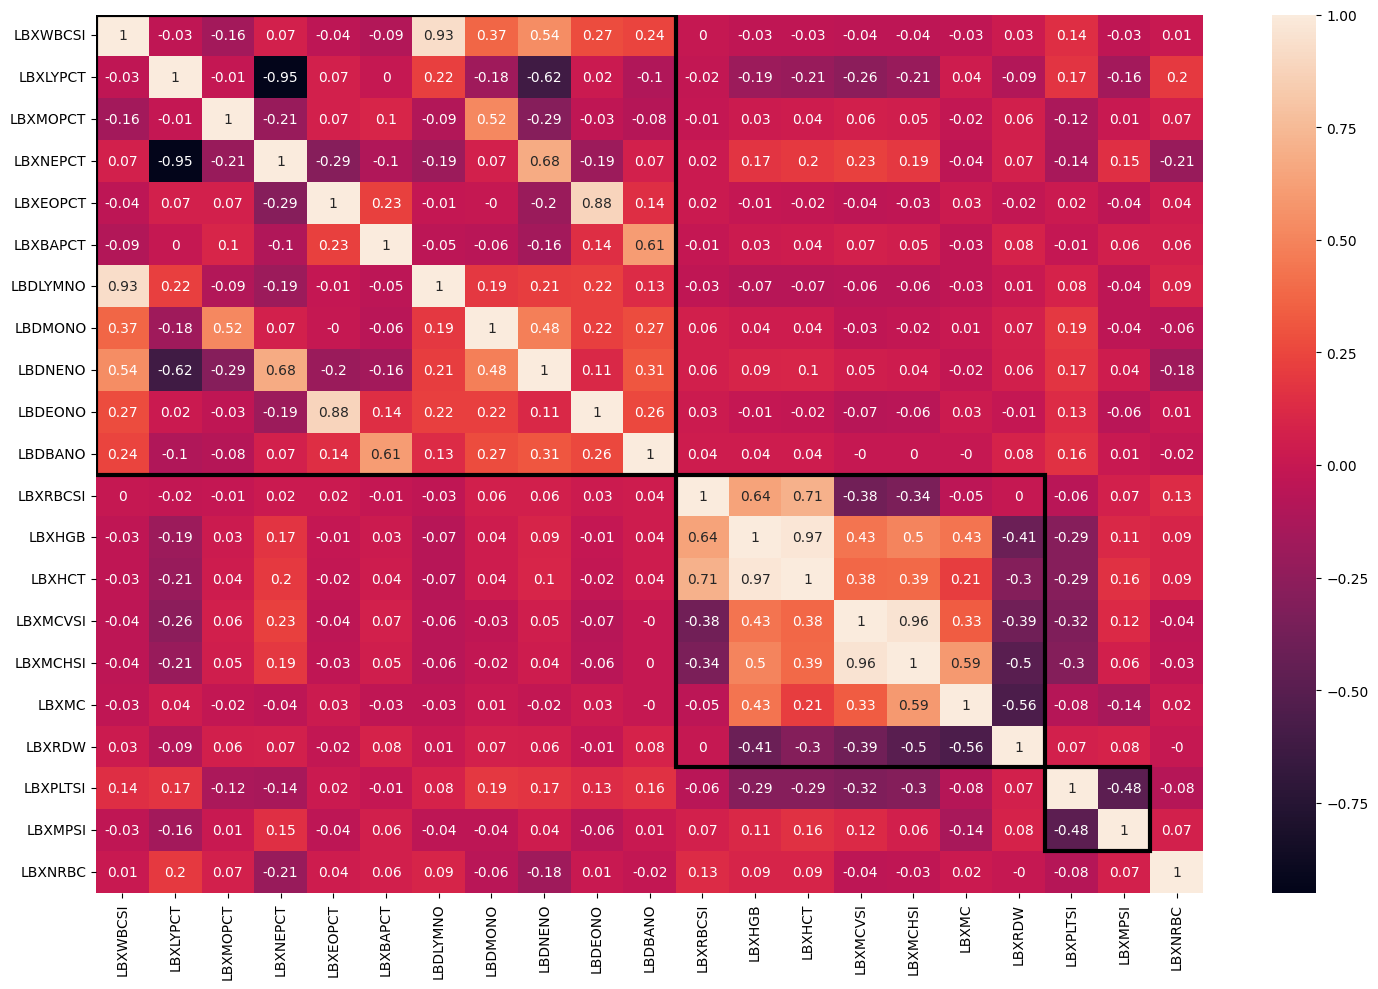

In [7]:
plt.figure(figsize=(15,10))
fig = sns.heatmap(cbc.iloc[:,1:].dropna().corr().round(2),annot=True)

whitec = Rectangle((0,0),11,11,fill=False,linewidth=3)
redc = Rectangle((11,11),7,7,fill=False,linewidth=3)
plaq = Rectangle((18,18),2,2,fill=False,linewidth=3)

for rect in [whitec,redc,plaq]:
    fig.add_patch(rect)

plt.tight_layout()
plt.show()

The three squares of interaction follow regular hematology behavior in literature:
1. White cells (upper square): white cells and subtypes.
2. Red cells (middle square): red cells and hemoglobin.
3. Plalelets (lower square): as is.

Depending on reference intervals and common use in medical literature, some variable may be dropped in order to reduce input dimensions.

---

# Standard Biochemistry Profile (BIOPRO)
* Category: Biochemistry profile.
* Range: 2017-2018
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/BIOPRO_J.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

In [8]:
biopro = pd.read_sas('BIOPRO_J.xpt')
biopro.describe()

SEQN     LBXSATSI      LBDSATLC       LBXSAL     LBDSALSI  \
count    6401.000000  5902.000000  5.902000e+03  5905.000000  5905.000000   
mean    98293.354320    21.420197  1.694341e-04     4.078645    40.786452   
std      2685.012056    16.949439  1.301669e-02     0.345033     3.450328   
min     93705.000000     2.000000  5.397605e-79     2.100000    21.000000   
25%     95962.000000    12.000000  5.397605e-79     3.900000    39.000000   
50%     98284.000000    17.000000  5.397605e-79     4.100000    41.000000   
75%    100623.000000    25.000000  5.397605e-79     4.300000    43.000000   
max    102956.000000   420.000000  1.000000e+00     5.400000    54.000000   

          LBXSAPSI     LBXSASSI     LBXSC3SI       LBXSBU     LBDSBUSI  ...  \
count  5903.000000  5882.000000  5901.000000  5901.000000  5901.000000  ...   
mean     90.616127    21.760456    25.541434    14.615489     5.218146  ...   
std      52.392677    12.952607     2.481768     5.984281     2.136455  ...   
min      16.000000     6.000000    16.000000     2.000000     0.710000  ...   
25%      64.000000    16.000000    24.000000    11.000000     3.930000  ...   
50%      79.000000    19.000000    26.000000    14.000000     5.000000  ...   
75%      98.000000    23.000000    27.000000    17.000000     6.070000  ...   
max     638.000000   272.000000    38.000000    79.000000    28.200000  ...   

            LBXSCA     LBDSCASI       LBXSCH     LBDSCHSI       LBXSTP  \
count  5901.000000  5901.000000  5903.000000  5903.000000  5901.000000   
mean      9.319793     2.329948   183.241741     4.738640     7.165819   
std       0.372979     0.093245    41.287669     1.067702     0.435356   
min       6.400000     1.600000    77.000000     1.991000     5.300000   
25%       9.100000     2.275000   153.000000     3.957000     6.900000   
50%       9.300000     2.325000   180.000000     4.655000     7.200000   
75%       9.600000     2.400000   208.000000     5.379000     7.400000   
max      11.700000     2.925000   438.000000    11.327000    10.000000   

          LBDSTPSI       LBXSTR    LBDSTRSI       LBXSUA     LBDSUASI  
count  5901.000000  5901.000000  5901.00000  5901.000000  5901.000000  
mean     71.658194   137.437553     1.55167     5.402406   321.335197  
std       4.353560   109.130574     1.23208     1.480927    88.085177  
min      53.000000    25.000000     0.28200     0.800000    47.600000  
25%      69.000000    77.000000     0.86900     4.300000   255.800000  
50%      72.000000   111.000000     1.25300     5.300000   315.200000  
75%      74.000000   162.000000     1.82900     6.300000   374.700000  
max     100.000000  2923.000000    33.00100    15.100000   898.100000  

[8 rows x 41 columns]

<Axes: >

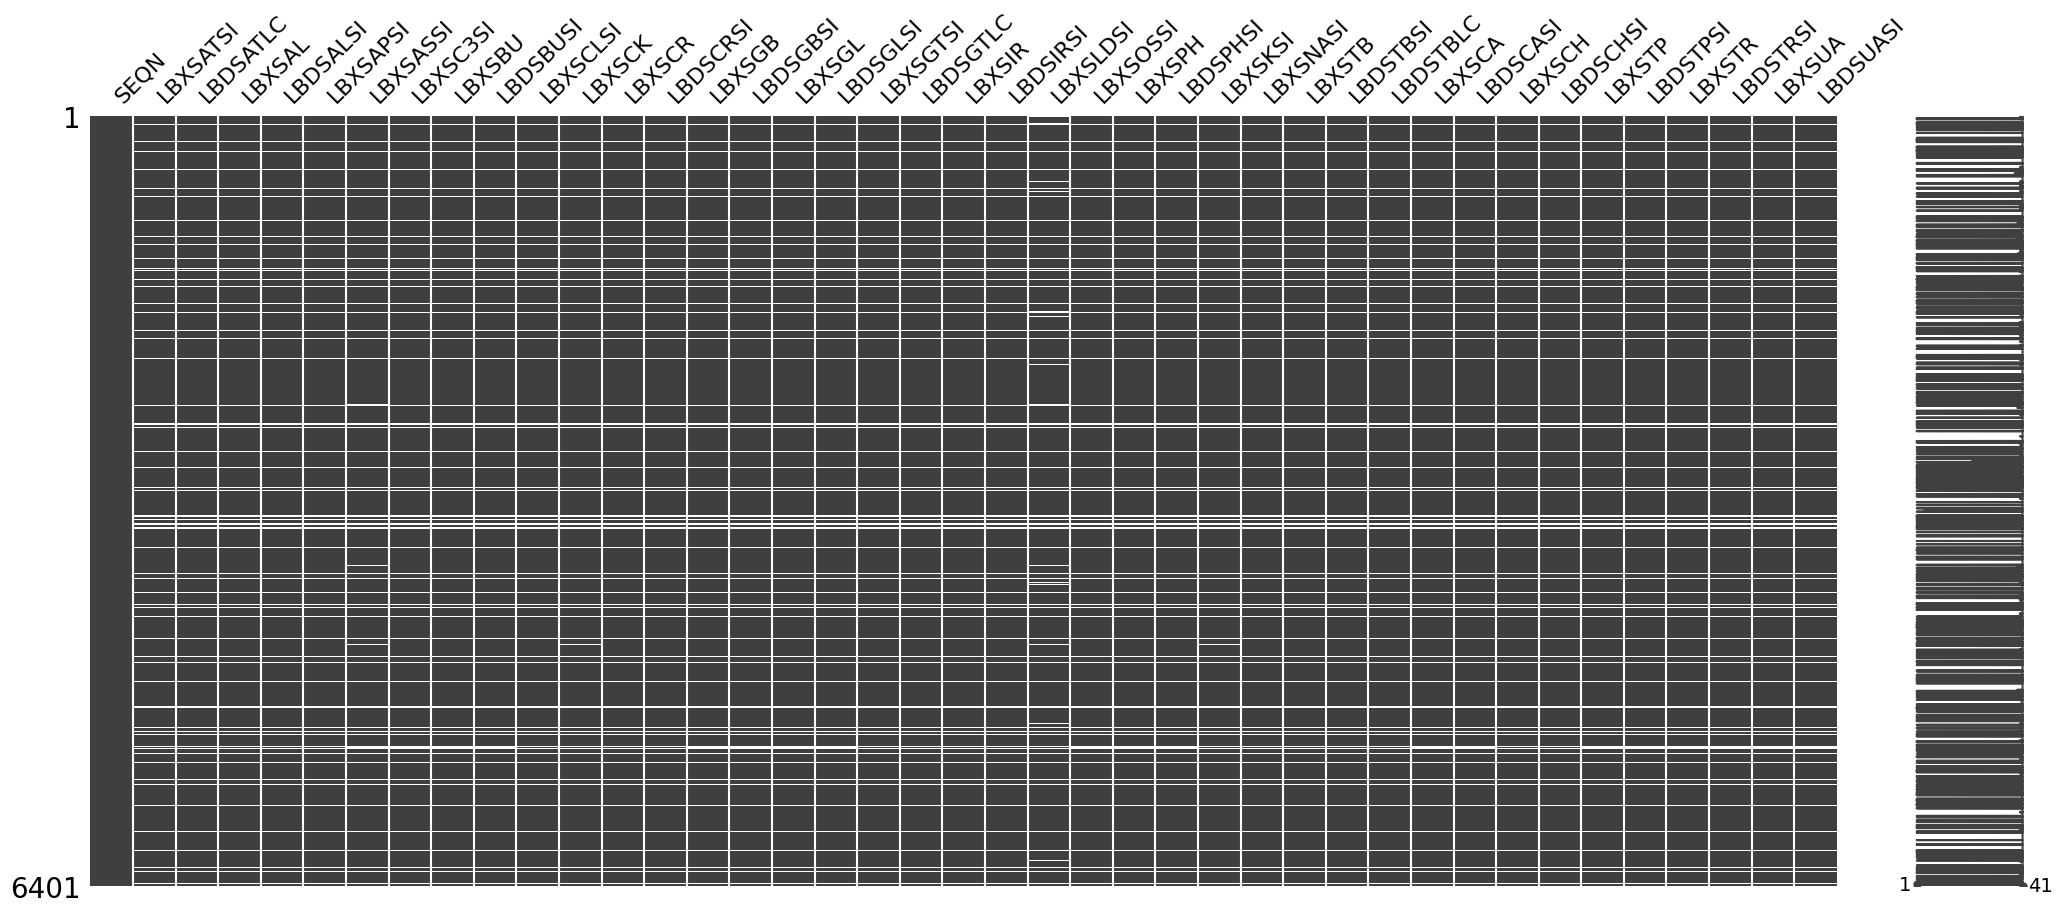

In [9]:
msno.matrix(biopro)

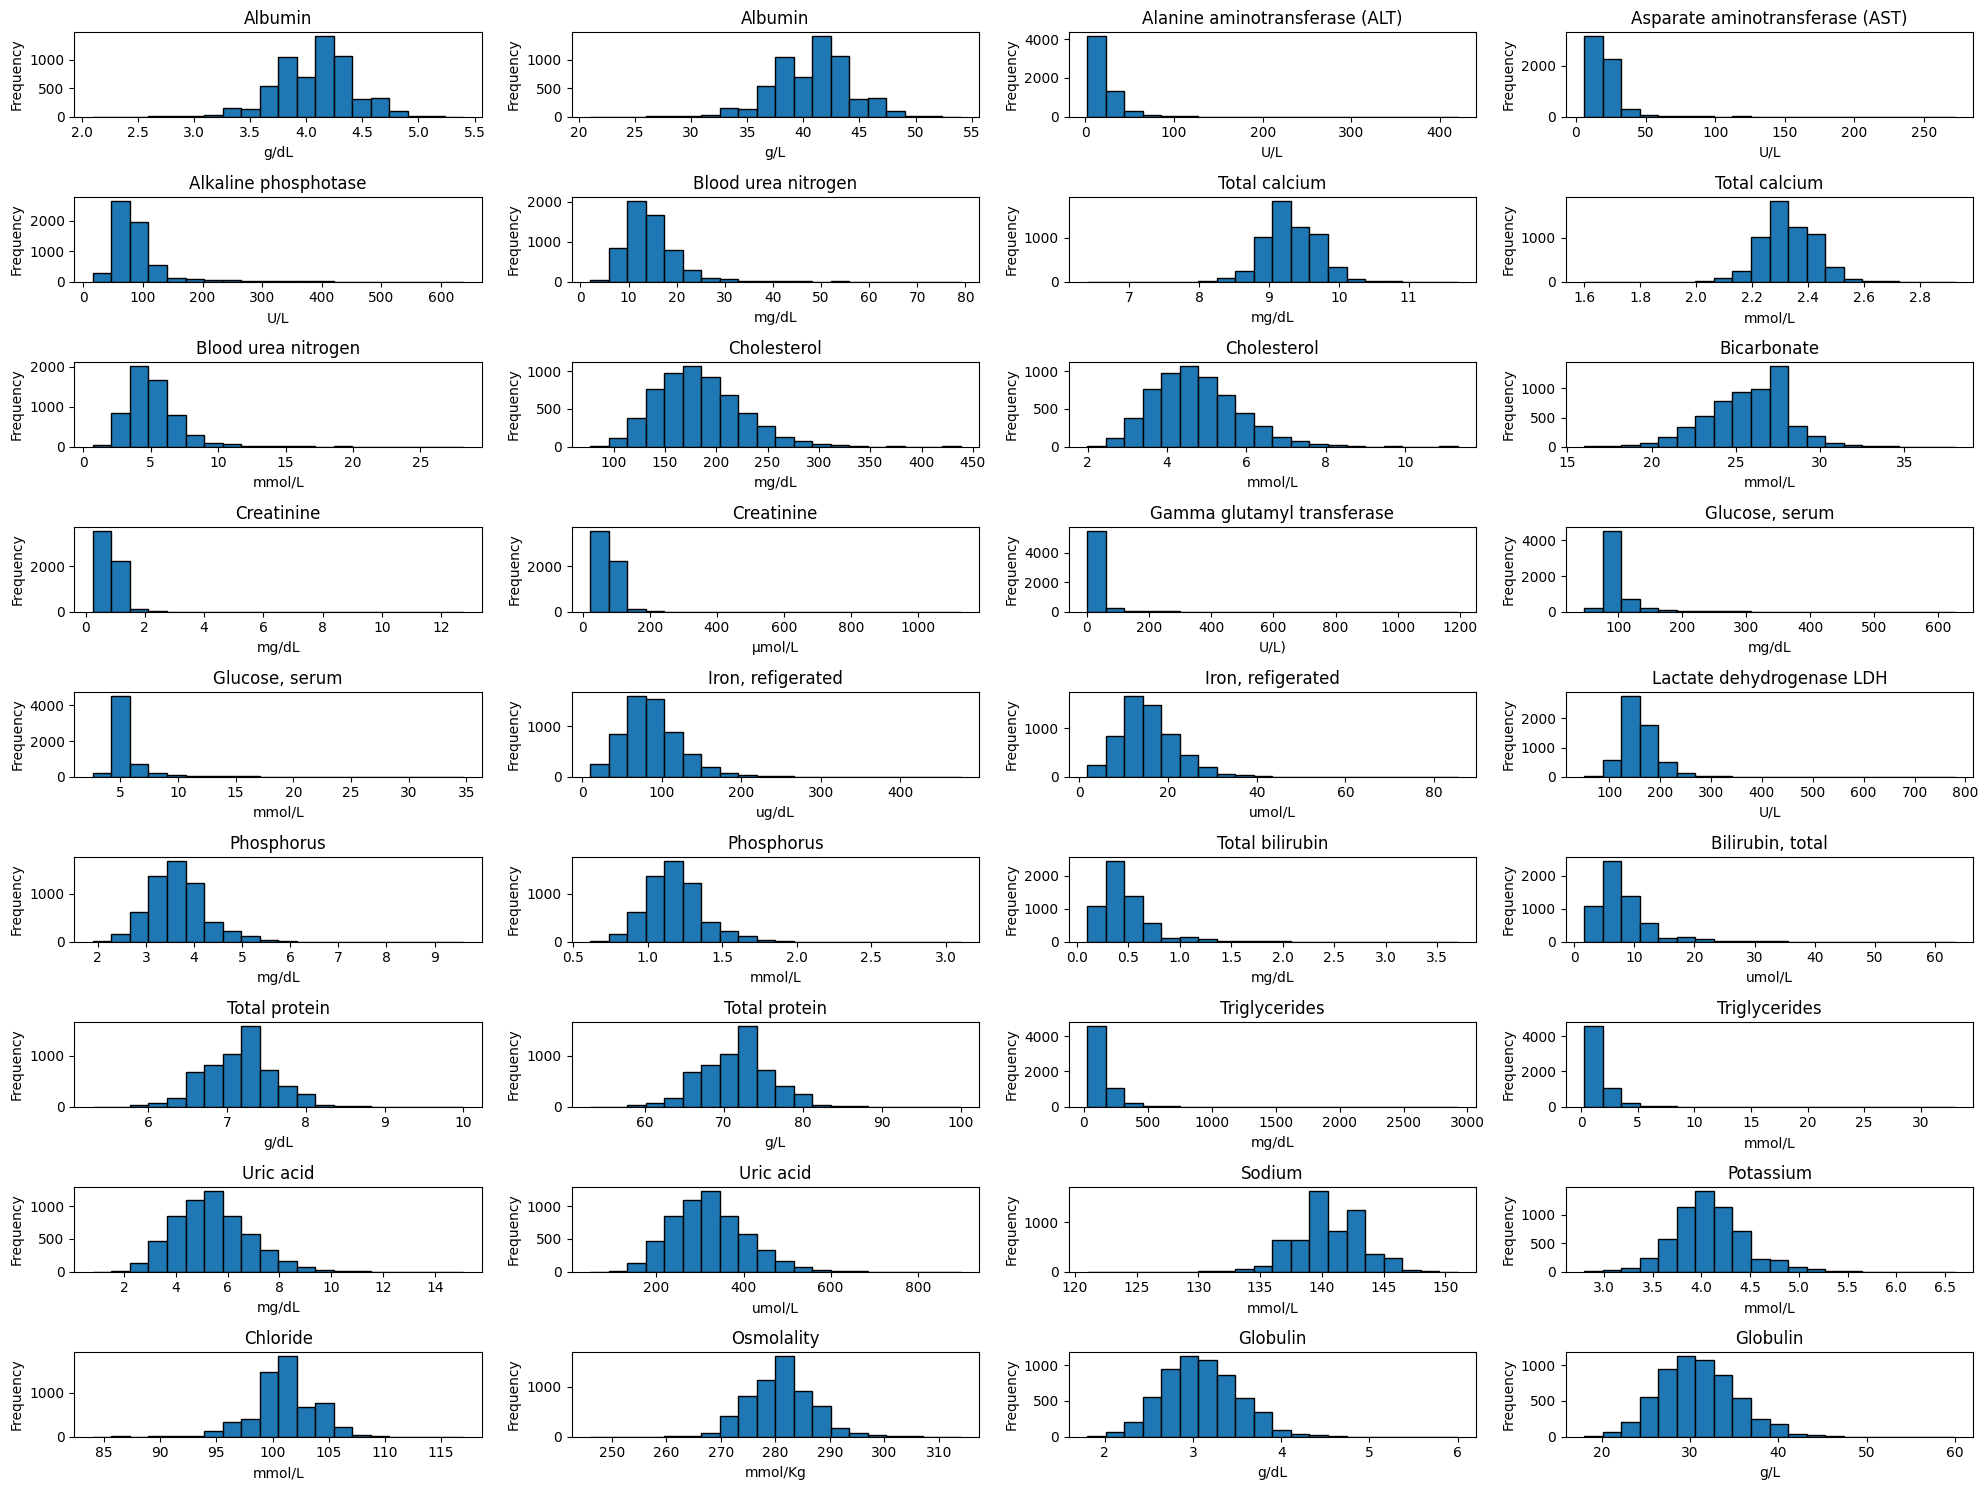

In [10]:
fig, axes = plt.subplots(9,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metabio.items()):
    ax = axes[i]
    ax.hist(biopro[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()